In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from lppls import lppls_cmaes

In [2]:
# Download S&P 500 historical data (Gold futures as 'GC=F')
data = yf.download('GC=F', start='2023-10-01', progress=False)

In [3]:
# Convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [4]:
# Log transformation of the adjusted close price
price = np.log(data['Adj Close'].values)

In [5]:
# Create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [6]:
results = []
for t1_index in np.arange(0, 365, 30):
    observations_window = observations[:, t1_index:]

    lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)

    try:
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        predicted_prices = lppls_model.lppls(observations_window[0], tc, m, w, a, b, c1, c2)
        
        # Compute RSS (Residual Sum of Squares)
        residuals = observations_window[1] - predicted_prices
        rss = np.sum(np.abs(residuals))  # Sum of squared residuals
        
        results.append((rss, tc, t1_index))
    except:
        pass

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=740657, Wed Oct 23 12:32:58 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.785490168901227e-02 1.0e+00 9.86e-01  9e-02  3e+04 0:05.2
    2    320 1.805947407675967e-02 2.9e+00 9.75e-01  9e-02  2e+04 0:05.2
    3    480 1.740950384893112e-02 5.9e+00 9.95e-01  8e-02  6e+03 0:05.3
   38   6080 1.298111518697729e-02 1.4e+03 1.90e+00  8e-08  6e-04 0:07.6
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=840591, Wed Oct 23 12:33:05 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.143658507895693e-02 1.0e+00 9.37e-01  8e-02  3e+04 0:01.7
    2    320 1.127300843285487e-02 2.5e+00 9.82e-01  8e-02  1e+04 0:01.8
    3    480 1.107242140119960e-02 6.7e+00 9.49e-01  6e-02  3e+03 0:01.8
   35   5600 9.451287868722968e-03 1.2e+02 2.42e+00  6e-08  1e-03 0:03.7
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=802217, Wed Oct 23 12:33:09

C:\Users\User\anaconda3\envs\ml\Lib\site-packages\lppls\lppls.py:617: RuntimeWarning: divide by zero encountered in scalar divide
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))


   41   6560 7.566021384387528e-03 4.4e+02 2.08e+00  6e-08  3e-04 0:02.4
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=712720, Wed Oct 23 12:33:12 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=722832, Wed Oct 23 12:33:12 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 4.648278332703612e-03 1.0e+00 1.03e+00  8e-02  2e+04 0:00.0
    2    320 4.635728202075174e-03 4.3e+00 1.08e+00  9e-02  1e+04 0:00.1
    3    480 4.590726251627476e-03 9.3e+00 1.00e+00  8e-02  6e+03 0:00.2
   41   6560 4.474157661377674e-03 8.2e+02 7.28e+00  5e-07  1e-03 0:03.0
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=806510, Wed Oct 23 12:33:15 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 2.544982621739967e-03 1.0e+00 1.03e+00  8e-02  5e+04 0:00.1
    2    320 2.544982487353950e-03 1.7e+00 9.97e-01  9e-02  2e+04 0:00.2
    3    480 2.544982669625242e-03 4.6e+00 9.52e-01  8e-02  1e+04 

In [7]:
opt_params = sorted(results, key=lambda x: x[0])[0]
tc_opt = opt_params[1]

In [8]:
opt_params

(0.33678185270985495, 739219.4778692352, 210)

In [9]:
print(pd.Timestamp.fromordinal(int(tc_opt)))

2024-11-29 00:00:00


In [10]:
observations_window = observations[:, opt_params[2]:]

In [11]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=836508, Wed Oct 23 12:33:24 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 6.513024394126256e-04 1.0e+00 1.09e+00  9e-02  7e+04 0:00.0
    2    320 7.249499170756544e-04 1.3e+00 1.02e+00  7e-02  5e+04 0:00.1
    3    480 7.801413187590362e-04 1.4e+00 9.91e-01  8e-02  3e+04 0:00.2
   36   5760 4.290810488537445e-04 2.1e+03 3.15e+00  6e-07  2e-04 0:02.7
2024-11-29 00:00:00


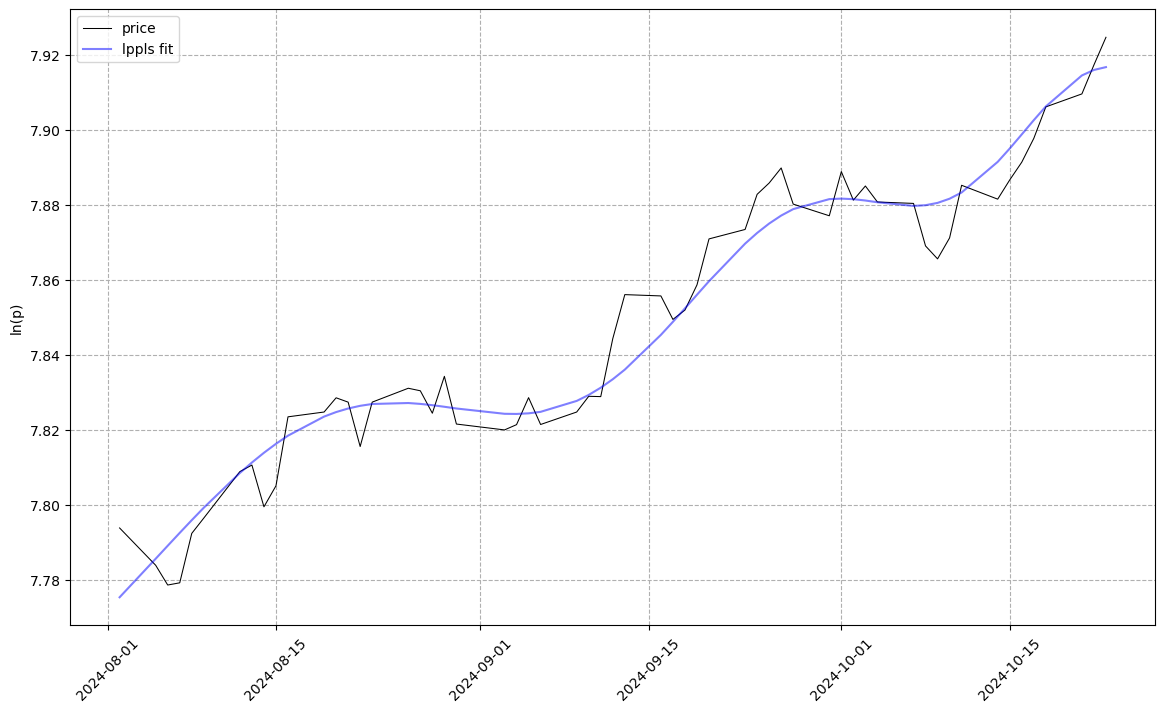

In [12]:
# visualize the fit
lppls_model.plot_fit()

In [13]:
len(observations_window[0])

58